데이터 로드

In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D
import matplotlib.pyplot as plt

데이터 전처리

In [2]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)

print(len(input_train))
print(len(input_test))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000
25000


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [7]:
pad_x_train = pad_sequences(input_train, maxlen=max_len)
pad_x_test = pad_sequences(input_test, maxlen=max_len)

print(pad_x_train.shape)
print(pad_x_test.shape)

(25000, 500)
(25000, 500)


모델 구성

In [15]:
from tensorflow.keras.optimizers import RMSprop
def build_model():
    model = Sequential()
    
    model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
    model.add(Conv1D(32, 7, activation='relu'))
    model.add(MaxPool1D(7))
    model.add(Conv1D(32, 5, activation='relu'))
    model.add(MaxPool1D(5))
    model.add(GlobalMaxPool1D())
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=RMSprop(learning_rate=1e-4), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [16]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 494, 32)           7200      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 70, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 66, 32)            5152      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [17]:
hist = model.fit(pad_x_train, y_train, epochs=30, batch_size=128,
                 validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 6s 37ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6922 - val_accuracy: 0.5642
Epoch 2/30
157/157 [==============================] - 6s 35ms/step - loss: 0.6907 - accuracy: 0.5974 - val_loss: 0.6912 - val_accuracy: 0.5932
Epoch 3/30
157/157 [==============================] - 6s 36ms/step - loss: 0.6879 - accuracy: 0.6783 - val_loss: 0.6888 - val_accuracy: 0.6534
Epoch 4/30
157/157 [==============================] - 6s 36ms/step - loss: 0.6829 - accuracy: 0.7330 - val_loss: 0.6823 - val_accuracy: 0.6822
Epoch 5/30
157/157 [==============================] - 6s 38ms/step - loss: 0.6709 - accuracy: 0.7459 - val_loss: 0.6633 - val_accuracy: 0.7392
Epoch 6/30
157/157 [==============================] - 6s 36ms/step - loss: 0.6405 - accuracy: 0.7713 - val_loss: 0.6194 - val_accuracy: 0.7636
Epoch 7/30
157/157 [==============================] - 6s 36ms/step - loss: 0.5794 - accuracy: 0.7982 - val_loss: 0.5452 - val_accuracy: 0.8020

시각화

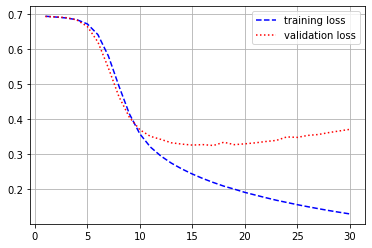

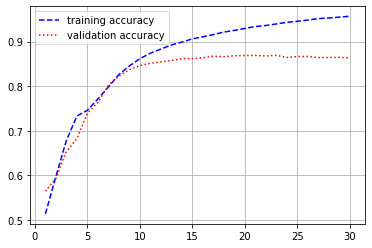

In [18]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

In [13]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 1.3081 - accuracy: 0.8280


[1.3080860376358032, 0.828000009059906]